# William Vann - Homework 6

### **Principal Findings:**

(1) My linear regression analysis for a random sample of approximately 500 world cities shows a strong correlation between **temperature** and **distance from the equator**. The first scatter plot below nicely visualizes that temperatures go up as you get nearer to the equator (latitude = 0), and go down as you get further from the equator.

(2) Additional linear regression analyses on this dataset show no meaningful correlations between latitude and the following features: _humidity, cloudiness, wind speed_. 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
from pprint import pprint

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

today_date = "TEST" # datetime.date.today()
output_data_file = f"../output_data/worldcities{today_date}.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Populate cities_dict with imperial weather data from OpenWeatherMap API
    
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "imperial"

api_call_log = f"../output_data/api_call_log{today_date}.txt"

cities_dict = {}

with open(api_call_log, "a") as logfile:
    
    for num,city in enumerate(cities[:11]):

        query_url = f"{base_url}appid={api_key}&q={city}&units={units}"

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Structure and initialize cities_dict

        cities_dict[city] = {

                "JSON": weather_json, "DATE": "NULL", "CITY": "NULL", "COUNTRY": "NULL",
                "LAT": 0.0, "LNG": 0.0, "MAX_TEMP": 0.0, "HUMIDITY": 0.0, 
                "CLOUDINESS": 0.0, "WIND_SPEED": 0.0    

                            }

        # Add relevant data points from json to cities_dict

        try:

            cities_dict[city]["DATE"] = weather_json["dt"]
            cities_dict[city]["CITY"] = weather_json["name"]
            cities_dict[city]["COUNTRY"] = weather_json["sys"]["country"]         
            cities_dict[city]["LAT"] = weather_json["coord"]["lat"]
            cities_dict[city]["LNG"] = weather_json["coord"]["lon"]
            cities_dict[city]["MAX_TEMP"] = weather_json["main"]["temp"]
            cities_dict[city]["HUMIDITY"] = weather_json["main"]["humidity"]
            cities_dict[city]["CLOUDINESS"] = weather_json["clouds"]["all"]     
            cities_dict[city]["WIND_SPEED"] =  weather_json["wind"]["speed"]

        except (KeyError, IndexError):

            print(f"{num} Info missing for {city} ... skipping!")
            logfile.write(f"{num} Info missing for {city} ... skipping!\n")
            continue

        else:

            print(f"{num} Working on {city} ...")
            logfile.write(f"{num} Working on {city} ...\n")

        finally:

            # timeout

            time.sleep(1.5)

    print(f"DONE!")
    logfile.write(f"DONE!\n")

0 Working on astoria ...
1 Working on wanaka ...
2 Working on chokurdakh ...
3 Working on adrar ...
4 Working on beyneu ...
5 Working on hamilton ...
6 Working on esperance ...
7 Working on constantine ...
8 Working on clyde river ...
9 Working on lavrentiya ...
10 Working on kapaa ...
DONE!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame([cities_dict[city] for city in cities_dict.keys()])

# Toss the rows where all needed api data not available

df_ = df.loc[(df["DATE"] != "NULL"), :]

df_.head()

,JSON,DATE,CITY,COUNTRY,LAT,LNG,MAX_TEMP,HUMIDITY,CLOUDINESS,WIND_SPEED
0,"{'coord': {'lon': -123.8313, 'lat': 46.1879}, ...",1659561265,Astoria,US,46.1879,-123.8313,65.12,71,100,5.01
1,"{'coord': {'lon': 169.15, 'lat': -44.7}, 'weat...",1659561465,Wanaka,NZ,-44.7000,169.1500,38.46,87,37,6.46
2,"{'coord': {'lon': 147.9167, 'lat': 70.6333}, '...",1659561467,Chokurdakh,RU,70.6333,147.9167,46.35,76,100,10.25
3,"{'coord': {'lon': -10.0711, 'lat': 20.5022}, '...",1659561469,Adrar,MR,20.5022,-10.0711,99.45,23,9,10.96
4,"{'coord': {'lon': 55.2, 'lat': 45.3167}, 'weat...",1659561471,Beyneu,KZ,45.3167,55.2000,84.15,27,5,6.44


In [5]:
df = df_.copy()

df.to_csv(output_data_file)

In [6]:
# Breakpoint for loading previously fetched api data

# cityweather_df = pd.read_csv("../output_data/cities_550.csv")

cityweather_df = df.copy()

# del cityweather_df["Unnamed: 0"]

cityweather_df.head()

# TEST:

# cityweather_df["CITY"].nunique() == len(cityweather_df)

,JSON,DATE,CITY,COUNTRY,LAT,LNG,MAX_TEMP,HUMIDITY,CLOUDINESS,WIND_SPEED
0,"{'coord': {'lon': -123.8313, 'lat': 46.1879}, ...",1659561265,Astoria,US,46.1879,-123.8313,65.12,71,100,5.01
1,"{'coord': {'lon': 169.15, 'lat': -44.7}, 'weat...",1659561465,Wanaka,NZ,-44.7000,169.1500,38.46,87,37,6.46
2,"{'coord': {'lon': 147.9167, 'lat': 70.6333}, '...",1659561467,Chokurdakh,RU,70.6333,147.9167,46.35,76,100,10.25
3,"{'coord': {'lon': -10.0711, 'lat': 20.5022}, '...",1659561469,Adrar,MR,20.5022,-10.0711,99.45,23,9,10.96
4,"{'coord': {'lon': 55.2, 'lat': 45.3167}, 'weat...",1659561471,Beyneu,KZ,45.3167,55.2000,84.15,27,5,6.44


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# chaining calls on cityweather_df to check humidity > 100%

(cityweather_df

     .HUMIDITY
     .gt(100)
     .sum()
)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.

# N/A

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

cityweather_df

,JSON,DATE,CITY,COUNTRY,LAT,LNG,MAX_TEMP,HUMIDITY,CLOUDINESS,WIND_SPEED
0,"{'coord': {'lon': -123.8313, 'lat': 46.1879}, ...",1659561265,Astoria,US,46.1879,-123.8313,65.12,71,100,5.01
1,"{'coord': {'lon': 169.15, 'lat': -44.7}, 'weat...",1659561465,Wanaka,NZ,-44.7000,169.1500,38.46,87,37,6.46
2,"{'coord': {'lon': 147.9167, 'lat': 70.6333}, '...",1659561467,Chokurdakh,RU,70.6333,147.9167,46.35,76,100,10.25
3,"{'coord': {'lon': -10.0711, 'lat': 20.5022}, '...",1659561469,Adrar,MR,20.5022,-10.0711,99.45,23,9,10.96
4,"{'coord': {'lon': 55.2, 'lat': 45.3167}, 'weat...",1659561471,Beyneu,KZ,45.3167,55.2000,84.15,27,5,6.44
5,"{'coord': {'lon': -84.5333, 'lat': 39.1834}, '...",1659561279,Hamilton,US,39.1834,-84.5333,90.41,56,20,11.50
6,"{'coord': {'lon': 121.9, 'lat': -33.8667}, 'we...",1659561474,Esperance,AU,-33.8667,121.9000,49.84,70,89,30.80
7,"{'coord': {'lon': 6.6147, 'lat': 36.365}, 'wea...",1659561476,Constantine,DZ,36.3650,6.6147,78.21,38,20,1.14
8,"{'coord': {'lon': -68.5914, 'lat': 70.4692}, '...",1659561478,Clyde River,CA,70.4692,-68.5914,39.43,100,100,11.50
9,"{'coord': {'lon': -171, 'lat': 65.5833}, 'weat...",1659561480,Lavrentiya,RU,65.5833,-171.0000,49.39,82,17,7.25


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The Pearson r correlation between both factors is -0.71


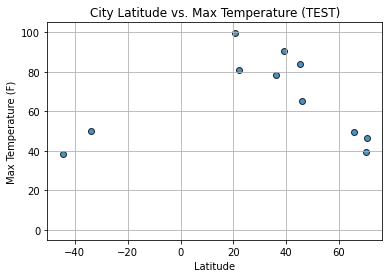

In [10]:
plt.scatter(cityweather_df["LAT"], cityweather_df["MAX_TEMP"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

# maybe ask Dom about using .abs() function here?

lat_temp_corr = pearsonr(cityweather_df["LAT"].abs(), cityweather_df["MAX_TEMP"])
print(f"The Pearson r correlation between both factors is {round(lat_temp_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **temperature** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

It appears to show - as we would expect - that **temperatures go up as you get nearer to the equator (latitude = 0), and go down as you get further from the equator**. 

## Latitude vs. Humidity Plot

The Pearson r correlation between both factors is 0.02


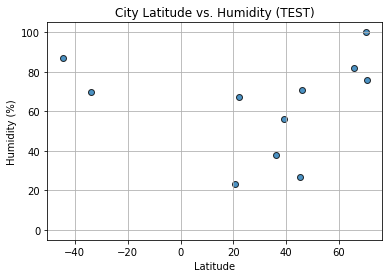

In [11]:
plt.scatter(cityweather_df["LAT"], cityweather_df["HUMIDITY"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

lat_humid_corr = pearsonr(cityweather_df["LAT"], cityweather_df["HUMIDITY"])
print(f"The Pearson r correlation between both factors is {round(lat_humid_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **humidity** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

There does not appear to be any detectable relationship, as the Pearson r value suggests. 

## Latitude vs. Cloudiness Plot

The Pearson r correlation between both factors is 0.1


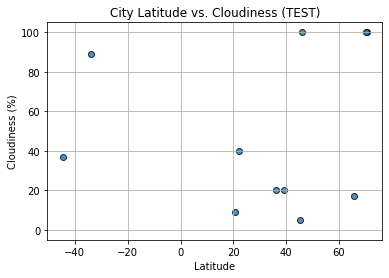

In [12]:
plt.scatter(cityweather_df["LAT"], cityweather_df["CLOUDINESS"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

lat_cloud_corr = pearsonr(cityweather_df["LAT"], cityweather_df["CLOUDINESS"])
print(f"The Pearson r correlation between both factors is {round(lat_cloud_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **cloudiness** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

There does not appear to be any detectable relationship, as the Pearson r value suggests. 

## Latitude vs. Wind Speed Plot

The Pearson r correlation between both factors is -0.44


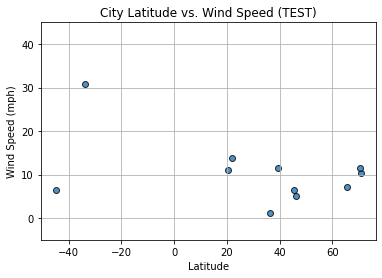

In [13]:
plt.scatter(cityweather_df["LAT"], cityweather_df["WIND_SPEED"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,45)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

lat_wind_corr = pearsonr(cityweather_df["LAT"], cityweather_df["WIND_SPEED"])
print(f"The Pearson r correlation between both factors is {round(lat_wind_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **wind speed** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

There does not appear to be any detectable relationship, as the Pearson r value suggests. 

## Linear Regression

In [14]:
# assign 0 to all cities

cityweather_df["HEMISPHERE"] = 0

# assign 1 to only Northern Hemisphere cities

cityweather_df.loc[(cityweather_df["LAT"] >= 0), "HEMISPHERE"] = 1

# named series for regressions

northern_latitudes = cityweather_df["HEMISPHERE"] == 1
southern_latitudes = cityweather_df["HEMISPHERE"] == 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value = -0.9126
The p-value = 0.0005949622306417228
The p-value is less than 0.05 = True
The std-error = 0.171


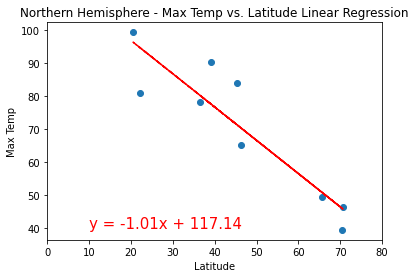

In [15]:
# Get relevant series from df

maxtemps = cityweather_df[northern_latitudes]["MAX_TEMP"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, maxtemps) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, maxtemps)
plt.plot(latitudes, a_fit, "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.savefig(f"../output_data/TempsLinReg_N_{today_date}.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value = 1.0
The p-value = 0.0
The p-value is less than 0.05 = True
The std-error = 0.0


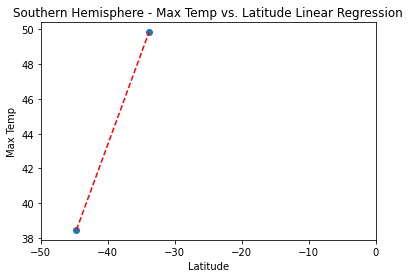

In [16]:
# Get relevant series from df

maxtemps = cityweather_df[southern_latitudes]["MAX_TEMP"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, maxtemps) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, maxtemps)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-50,85), fontsize=15, color="red")
plt.savefig(f"../output_data/TempsLinReg_S_{today_date}.png")
plt.show()

The two previous linear regressions are testing for correlation between **temperature** and **distance from the equator**. 

The r-values for the Northern Hemisphere and Southern Hemisphere suggest a **strong correlation**. As you approach the equator, temperatures trend upward. As you move away from the equator, temperatures trend downward. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value = 0.7079
The p-value = 0.03285896245950233
The p-value is less than 0.05 = True
The std-error = 0.3634


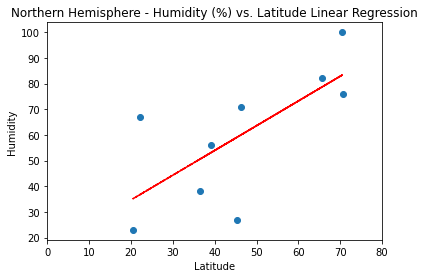

In [17]:
# Get relevant series from df

humidities = cityweather_df[northern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, humidities) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, humidities)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (43,10), fontsize=15, color="red")
plt.savefig(f"../output_data/HumidLinReg_N_{today_date}.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value = -1.0
The p-value = 0.0
The p-value is less than 0.05 = True
The std-error = 0.0


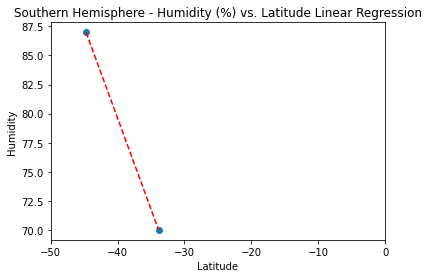

In [18]:
# Get relevant series from df

humidities = cityweather_df[southern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, humidities) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, humidities)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")
plt.savefig(f"../output_data/HumidLinReg_S_{today_date}.png")
plt.show()

The two previous linear regressions are testing for correlation between **humidity** and **distance from the equator**. The low r-values for the Northern Hemisphere and Southern Hemisphere suggest **no correlation**. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value = 0.5654
The p-value = 0.11263267602147586
The p-value is less than 0.05 = False
The std-error = 0.6797


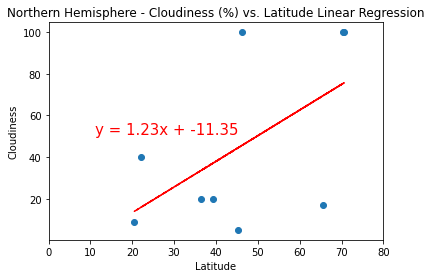

In [19]:
# Get relevant series from df

cloudinesses = cityweather_df[northern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, cloudinesses) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, cloudinesses)
plt.plot(latitudes, a_fit, "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (11,51), fontsize=15, color="red")
plt.savefig(f"../output_data/CloudLinReg_N_{today_date}.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value = 1.0
The p-value = 0.0
The p-value is less than 0.05 = True
The std-error = 0.0


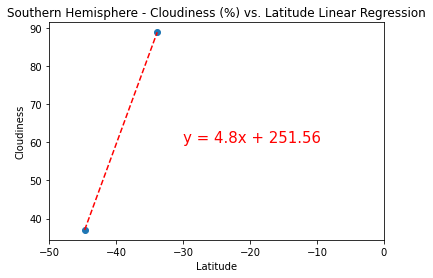

In [20]:
# Get relevant series from df

cloudinesses = cityweather_df[southern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, cloudinesses) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, cloudinesses)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-30,60), fontsize=15, color="red")
plt.savefig(f"../output_data/CloudLinReg_S_{today_date}.png")

plt.show()

The two previous linear regressions are testing for correlation between **cloudiness** and **distance from the equator**. The low r-values for the Northern Hemisphere and Southern Hemisphere suggest **no correlation**. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value = -0.0761
The p-value = 0.8456961723590474
The p-value is less than 0.05 = False
The std-error = 0.0782


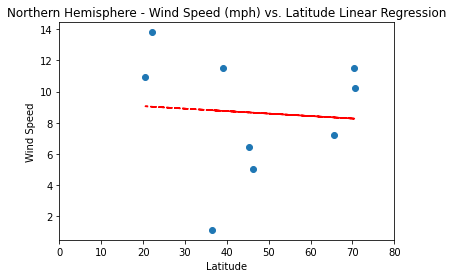

In [21]:
# Get relevant series from df

windspeeds = cityweather_df[northern_latitudes]["WIND_SPEED"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, windspeeds) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, windspeeds)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (43,28), fontsize=15, color="red")
plt.savefig(f"../output_data/WindLinReg_N_{today_date}.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value = 1.0
The p-value = 0.0
The p-value is less than 0.05 = True
The std-error = 0.0


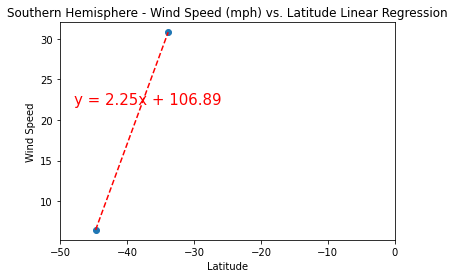

In [22]:
# Get relevant series from df

windspeeds = cityweather_df[southern_latitudes]["WIND_SPEED"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, windspeeds) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, windspeeds)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-48,22), fontsize=15, color="red")
plt.savefig(f"../output_data/CloudLinReg_S_{today_date}.png")

plt.show()

The two previous linear regressions are testing for correlation between **wind speed** and **distance from the equator**. The low r-values for the Northern Hemisphere and Southern Hemisphere suggest **no correlation**. 